# Predicting Fuel Efficiency of Vehicles
## Selecting and Training Models

1. Select and Train a few Algorithms(Linear Regression, Decision Tree, RandomForest)
2. Evaluation using Mean Squared Error
3. Model Evaluation using Cross Validation
4. Hyperparameter Tuning using GridSearchCV
5. Check Feature Importance
6. Evaluate the Final System on test data
7. Saving the Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cols = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
# Reading the .data file using pandas
df = pd.read_csv('auto-mpg.data', names=cols, na_values = '?',
                comment = '\t',
                sep = ' ',
                skipinitialspace = True)
# Make a copy of the dataframe
data = df.copy()

In [3]:
df.sample(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
309,41.5,4,98.0,76.0,2144.0,14.7,80,2
391,36.0,4,135.0,84.0,2370.0,13.0,82,1
16,18.0,6,199.0,97.0,2774.0,15.5,70,1
377,31.0,4,91.0,68.0,1970.0,17.6,82,3
220,33.5,4,85.0,70.0,1945.0,16.8,77,3


**Problem Statement** — The data contains the MPG(Mile Per Gallon) variable which is continuous data and tells us about the efficiency of fuel consumption of a vehicle in the 70s and 80s.

In [4]:
# Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [5]:
# Check for all null values
data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [6]:
data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


<AxesSubplot:xlabel='Horsepower'>

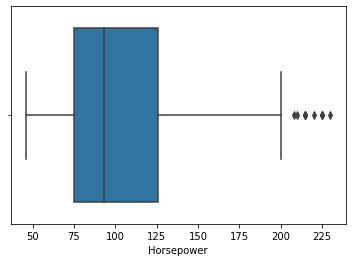

In [7]:
# Check for outliers in horsepower column
sns.boxplot(x=data['Horsepower'])

In [8]:
# Since there are a few outliers, we can use the median of the column
# to impute the missing values using the pandas median() method.
median = data['Horsepower'].median()
data['Horsepower'] = data['Horsepower'].fillna(median)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [9]:
# Category Distribution
data['Cylinders'].value_counts()/len(data)

4    0.512563
8    0.258794
6    0.211055
3    0.010050
5    0.007538
Name: Cylinders, dtype: float64

In [10]:
data['Origin'].value_counts()

1    249
3     79
2     70
Name: Origin, dtype: int64

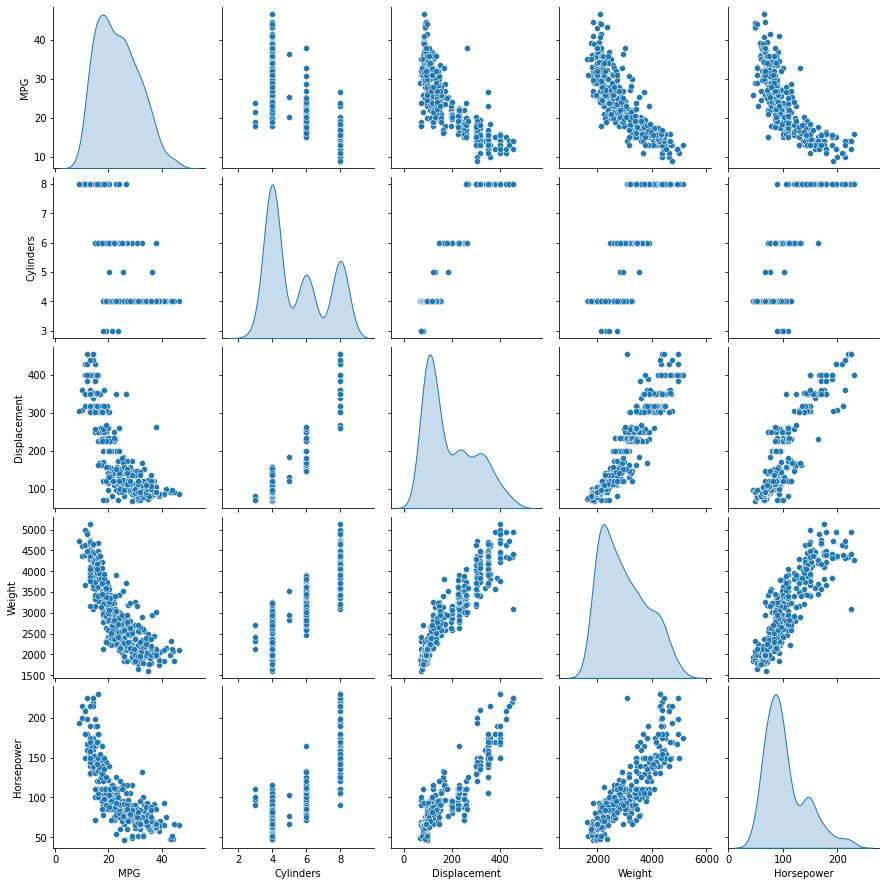

In [11]:
# pairplots to get an intuition of potential correlations
sns.pairplot(data[["MPG", "Cylinders", "Displacement", "Weight", "Horsepower"]], diag_kind="kde")

In [12]:
# Split the data into train and test using stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state = 42)
for train_index, test_index in split.split(data, data['Cylinders']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [13]:
# Checking for the cylinder distribution in training set
strat_train_set['Cylinders'].value_counts() / len(strat_train_set)

4    0.512579
8    0.257862
6    0.210692
5    0.009434
3    0.009434
Name: Cylinders, dtype: float64

In [14]:
# for test dataset
strat_test_set['Cylinders'].value_counts() / len(strat_test_set)

4    0.5125
8    0.2625
6    0.2125
3    0.0125
Name: Cylinders, dtype: float64

In [15]:
data = strat_train_set.drop("MPG", axis=1)
data_labels = strat_train_set["MPG"].copy()
data

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
145,4,83.0,61.0,2003.0,19.0,74,3
151,4,79.0,67.0,2000.0,16.0,74,2
388,4,156.0,92.0,2585.0,14.5,82,1
48,6,250.0,88.0,3139.0,14.5,71,1
114,4,98.0,90.0,2265.0,15.5,73,2
...,...,...,...,...,...,...,...
147,4,90.0,75.0,2108.0,15.5,74,2
156,8,400.0,170.0,4668.0,11.5,75,1
395,4,135.0,84.0,2295.0,11.6,82,1
14,4,113.0,95.0,2372.0,15.0,70,3


In [16]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [17]:
# preprocess the Origin column in data
def preprocess_origin_cols(df):
    df["Origin"] = df["Origin"].map({1: "India", 2: "USA", 3: "Germany"})
    return df

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin

acc_ix, hpower_ix, cyl_ix = 4, 2, 0

##custom class inheriting the BaseEstimator and TransformerMixin
class CustomAttrAdder(BaseEstimator, TransformerMixin):
    def __init__(self, acc_on_power=True):
        self.acc_on_power = acc_on_power  # new optional variable
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        acc_on_cyl = X[:, acc_ix] / X[:, cyl_ix] # required new variable
        if self.acc_on_power:
            acc_on_power = X[:, acc_ix] / X[:, hpower_ix]
            return np.c_[X, acc_on_power, acc_on_cyl] # returns a 2D array
        
        return np.c_[X, acc_on_cyl]

In [19]:
def num_pipeline_transformer(data):
    '''
    Function to process numerical transformations
    Argument:
        data: original dataframe 
    Returns:
        num_attrs: numerical dataframe
        num_pipeline: numerical pipeline object
        
    '''
    numerics = ['float64', 'int64']

    num_attrs = data.select_dtypes(include=numerics)

    num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attrs_adder', CustomAttrAdder()),
        ('std_scaler', StandardScaler()),
        ])
    return num_attrs, num_pipeline

In [20]:
def pipeline_transformer(data):
    '''
    Complete transformation pipeline for both
    nuerical and categorical data.
    
    Argument:
        data: original dataframe 
    Returns:
        prepared_data: transformed data, ready to use
    '''
    cat_attrs = ["Origin"]
    num_attrs, num_pipeline = num_pipeline_transformer(data)
    full_pipeline = ColumnTransformer([
        ("num", num_pipeline, list(num_attrs)),
        ("cat", OneHotEncoder(), cat_attrs),
        ])
    prepared_data = full_pipeline.fit_transform(data)
    return prepared_data

In [21]:
# from raw data to processed data in 2 steps

preprocessed_df = preprocess_origin_cols(data)
prepared_data = pipeline_transformer(preprocessed_df)
prepared_data

array([[-0.85657842, -1.07804475, -1.15261228, ...,  1.        ,
         0.        ,  0.        ],
       [-0.85657842, -1.1174582 , -0.99069325, ...,  0.        ,
         0.        ,  1.        ],
       [-0.85657842, -0.3587492 , -0.31603064, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.85657842, -0.56566984, -0.53192268, ...,  0.        ,
         1.        ,  0.        ],
       [-0.85657842, -0.78244384, -0.23507113, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.32260746, -0.45728283,  0.43959149, ...,  1.        ,
         0.        ,  0.        ]])

### Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_reg.fit(prepared_data, data_labels)

# testing the predictions with the 
sample_data = data.iloc[:5]
sample_labels = data_labels.iloc[:5]

sample_data_prepared = pipeline_transformer(sample_data)

print("Prediction of samples: ", lin_reg.predict(sample_data_prepared))
print("Actual Labels of samples: ", list(sample_labels))

Prediction of samples:  [29.07706113 27.78221362 26.08507595 12.68921922 22.24811759]
Actual Labels of samples:  [32.0, 31.0, 26.0, 18.0, 26.0]


### Mean Squared Error

In [23]:
from sklearn.metrics import mean_squared_error
mpg_predictions = lin_reg.predict(prepared_data)
lin_mse = mean_squared_error(data_labels, mpg_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.9599557382767734

### Decision Tree

In [24]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(prepared_data, data_labels)

DecisionTreeRegressor()

In [25]:
mpg_predictions = tree_reg.predict(prepared_data)
tree_mse = mean_squared_error(data_labels, mpg_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### Random Forest Model

In [26]:
from sklearn.ensemble import RandomForestRegressor

random_tree_reg = RandomForestRegressor(random_state=24)
random_tree_reg.fit(prepared_data, data_labels)

mpg_predictions = random_tree_reg.predict(prepared_data)
random_tree_mse = mean_squared_error(data_labels, mpg_predictions)
random_tree_rmse = np.sqrt(random_tree_mse)
random_tree_rmse

0.9911761325749128

### Model Evaluation using Cross Validation

In [27]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, 
                         prepared_data, 
                         data_labels, 
                         scoring="neg_mean_squared_error", 
                         cv = 10)
tree_reg_rmse_scores = np.sqrt(-scores)

In [28]:
tree_reg_rmse_scores.mean()

3.2848589809442137

In [29]:
# Linear Regression using cross validation set
scores = cross_val_score(lin_reg, prepared_data, data_labels, scoring="neg_mean_squared_error", cv = 10)
lin_reg_rmse_scores = np.sqrt(-scores)
lin_reg_rmse_scores.mean()

3.0767797889608994

### Random Forest model ( Cross Val)

In [30]:
forest_reg = RandomForestRegressor()
forest_reg.fit(prepared_data, data_labels)
forest_reg_cv_scores = cross_val_score(forest_reg,
                                         prepared_data,
                                         data_labels,
                                         scoring='neg_mean_squared_error',
                                         cv = 10)

forest_reg_rmse_scores = np.sqrt(-forest_reg_cv_scores)
forest_reg_rmse_scores.mean()

2.5747012406922205

### Support Vector Machine Regressor

In [31]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='linear')
svm_reg.fit(prepared_data, data_labels)
svm_cv_scores = cross_val_score(svm_reg, prepared_data, data_labels,
                                scoring='neg_mean_squared_error',
                                cv = 10)
svm_rmse_scores = np.sqrt(-svm_cv_scores)
svm_rmse_scores.mean()


3.088411910825019

### Hyperparameter Tuning using GridSearchCV

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,
                           cv=10,
                          )

grid_search.fit(prepared_data, data_labels)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [33]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [34]:
cv_scores = grid_search.cv_results_
# Printing all the parameters along with their scores
for mean_score, params in zip(cv_scores['mean_test_score'], cv_scores['params']):
    print(np.sqrt(-mean_score), params)

3.5787410401977535 {'max_features': 2, 'n_estimators': 3}
2.999602498867088 {'max_features': 2, 'n_estimators': 10}
2.9019422761340956 {'max_features': 2, 'n_estimators': 30}
3.222425898889705 {'max_features': 4, 'n_estimators': 3}
2.8973866892453493 {'max_features': 4, 'n_estimators': 10}
2.7825074985326963 {'max_features': 4, 'n_estimators': 30}
3.193349050542729 {'max_features': 6, 'n_estimators': 3}
2.8482872754035546 {'max_features': 6, 'n_estimators': 10}
2.700634845673968 {'max_features': 6, 'n_estimators': 30}
2.9971142221133755 {'max_features': 8, 'n_estimators': 3}
2.87655221071472 {'max_features': 8, 'n_estimators': 10}
2.699935644269864 {'max_features': 8, 'n_estimators': 30}
3.2761467526353067 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
2.9582469709490162 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
3.2594155209991964 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
2.8225467027337037 {'bootstrap': False, 'max_features': 3, 'n_estima

In [35]:
# Feature importance
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.21807596, 0.28901719, 0.12451093, 0.18856819, 0.01533777,
       0.11232161, 0.02920664, 0.0181604 , 0.00210384, 0.00108823,
       0.00160924])

In [36]:
extra_attrs = ["acc_on_power", "acc_on_cyl"]
numerics = ['float64', 'int64']
num_attrs = list(data.select_dtypes(include=numerics))

attrs = num_attrs + extra_attrs
sorted(zip(attrs, feature_importances), reverse=True)

[('acc_on_power', 0.029206638628792476),
 ('acc_on_cyl', 0.018160399137911568),
 ('Weight', 0.18856818756556581),
 ('Model Year', 0.11232160665841945),
 ('Horsepower', 0.12451093139694776),
 ('Displacement', 0.2890171891922707),
 ('Cylinders', 0.21807596492306472),
 ('Acceleration', 0.015337766998897846)]

### Evaluating the model on Test Data

In [37]:
# capturing the best configuration
final_model = grid_search.best_estimator_

# segregating the target variable from test set
X_test = strat_test_set.drop("MPG", axis=1)
y_test = strat_test_set["MPG"].copy()
# preprocessing the test data origin column
X_test_preprocessed = preprocess_origin_cols(X_test)

# preparing the data with final transformation
X_test_prepared = pipeline_transformer(X_test_preprocessed)

##making final predictions
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [38]:
final_rmse

2.8958576977392307

### Creating a function to cover this entire flow

In [39]:
def predict_mpg(config, model):
    
    if type(config) == dict:
        df = pd.DataFrame(config)
    else:
        df = config
    
    preproc_df = preprocess_origin_cols(df)
    prepared_df = pipeline_transformer(preproc_df)
    y_pred = model.predict(prepared_df)
    return y_pred
    

In [40]:
##checking it on a random sample
vehicle_config = {
    'Cylinders': [4, 6, 8],
    'Displacement': [155.0, 160.0, 165.5],
    'Horsepower': [93.0, 130.0, 98.0],
    'Weight': [2500.0, 3150.0, 2600.0],
    'Acceleration': [15.0, 14.0, 16.0],
    'Model Year': [81, 80, 78],
    'Origin': [3, 2, 1]
}

predict_mpg(vehicle_config, final_model)

array([33.34666667, 18.28      , 21.61333333])

In [41]:
import pickle

In [42]:
##saving the model
with open("model.bin", 'wb') as f_out:
    pickle.dump(final_model, f_out)
    f_out.close()

In [43]:
##loading the model from the saved file
with open('model.bin', 'rb') as f_in:
    model = pickle.load(f_in)

predict_mpg(vehicle_config, model)

array([33.34666667, 18.28      , 21.61333333])